In [11]:
import matplotlib.pyplot as plt

from superfv import AdvectionSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis
import numpy as np

In [ ]:
N = 64
p = 3

apriori_sim = AdvectionSolver(
    ic=lambda array_slicer, x, y, z: ic.square(array_slicer, x, y, z, vx=1),
    nx=N,
    p=p,
    ZS=True,
    max_dt_revisions=8,
    CFL=0.8,
    PAD={"rho": (0.0, 1.0)},
)
apriori_sim.run(1.0)

100%|██████████| 1.0/1.0 [00:00]                 


In [13]:
np.min(apriori_sim.minisnapshots["min_rho"]), np.max(
    apriori_sim.minisnapshots["max_rho"]
)

(np.float64(0.0), np.float64(1.0))

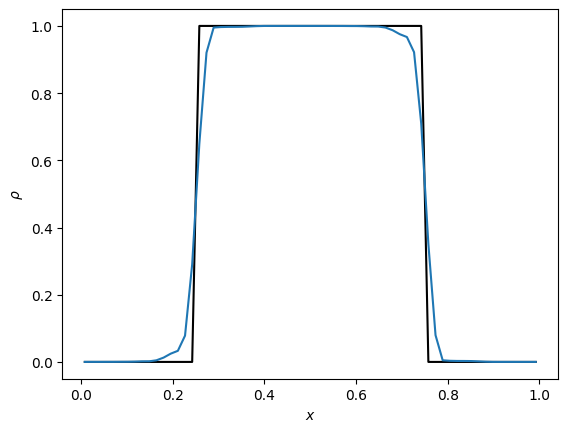

In [14]:
fig, ax = plt.subplots(1, 1)
ax.set_ylabel(r"$\rho$")
vis.plot_1d_slice(apriori_sim, ax, "rho", cell_averaged=True, x=None, t=0, color="k")
vis.plot_1d_slice(apriori_sim, ax, "rho", cell_averaged=True, x=None, xlabel=True)

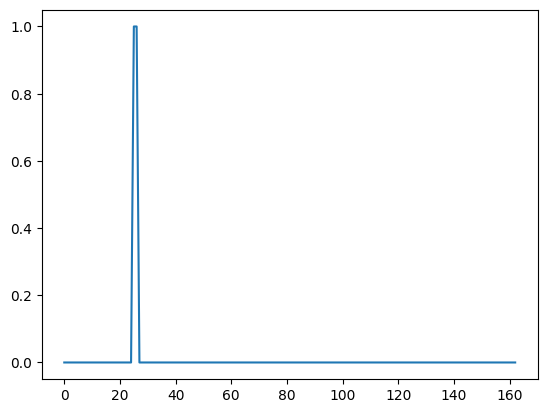

In [15]:
plt.plot(apriori_sim.minisnapshots["dt_revisions"])